In [1]:
# Reda Alhamza 
# ID: 201365390   
# MIS 545 - 02
# Chapter 4 Assignment 

In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
bank = pd.read_csv("D:/DatasetsP/bank_marketing_training")
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26869,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,no
26870,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes
26871,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963,no
26872,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes


In [5]:
# Q1: Produce the following graphs. What is the strength of each graph? Weakness?

In [6]:
# a. Bar graph of marital.

<AxesSubplot:>

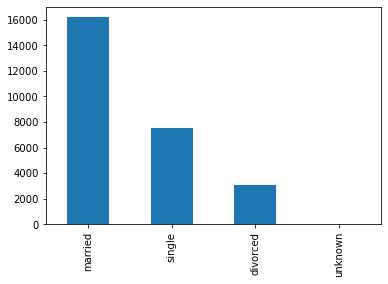

In [7]:
bank['marital'].value_counts().plot(kind = 'bar') 

# Strenghth: Showing distribution of marital variables and how many records there.
# Weekness: can't see the proportions of the 4 categories to the total or as percentage.

In [8]:
# b. Bar graph of marital, with overlay of response.

In [9]:
crosstab01 = pd.crosstab(bank['marital'],bank['response'])
crosstab01

response,no,yes
marital,,
divorced,2743,312
married,14579,1608
single,6514,1061
unknown,50,7


<AxesSubplot:xlabel='marital'>

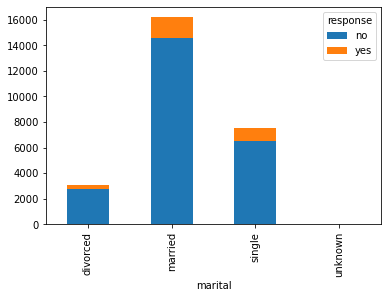

In [10]:
crosstab01.plot(kind = 'bar', stacked = True)
# Strenghth: Show distribution and number of records.
# Weekness: unable to see response proportion in each marital status.

In [11]:
# c. Normalized bar graph of marital, with overlay of response.

In [12]:
norm_ct01 = crosstab01.div(crosstab01.sum(1), axis = 0)
norm_ct01

response,no,yes
marital,,
divorced,0.897872,0.102128
married,0.900661,0.099339
single,0.859934,0.140066
unknown,0.877193,0.122807


<AxesSubplot:xlabel='marital'>

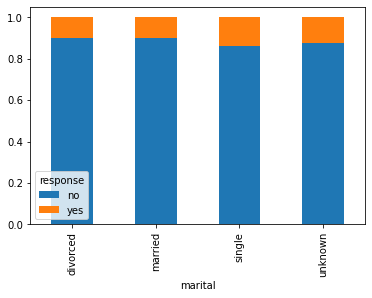

In [13]:
norm_ct01.plot(kind = 'bar', stacked = True)

# Strenghth: indicates the proportion in each marital status.
# Weekness: the original distribution can't be known from the normalized bar graph and number of records.

In [14]:
# Q2: Produce the following graphs. What is the strength of each graph? Weakness?

In [15]:
# a. Histogram of duration.

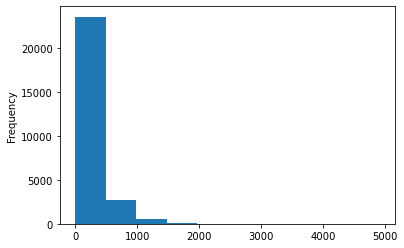

In [16]:
bank_hist = bank['duration'].plot(kind = 'hist')

# Strenghth: able to see distrubtion and determine its shape.
# Weekness: not able to see proprtions of the duration to the total duration.

In [17]:
# b. Histogram of duration, with overlay of response.

In [18]:
crosstab02 = pd.crosstab(bank['duration'], bank['response'])
crosstab02

response,no,yes
duration,,
0,2,0
1,2,0
2,1,0
3,3,0
4,5,0
...,...,...
3631,0,1
3643,0,1
3785,1,0


<AxesSubplot:ylabel='Frequency'>

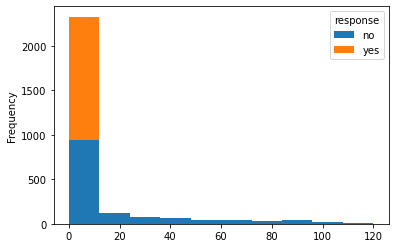

In [19]:
crosstab02.plot(kind = 'hist', stacked = True)

# Strenghth: Shows data distribution.
# Weekness: can't distinguish proportion patterns.

In [20]:
# c. Normalized histogram of duration, with overlay of response.

In [21]:
duration_yes = bank[bank.response == "yes"]['duration']
duration_no = bank[bank.response == "no"]['duration']

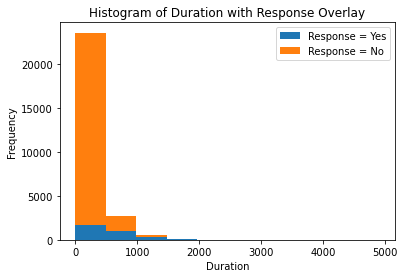

In [22]:
plt.hist([duration_yes,duration_no], stacked = True)
plt.legend(['Response = Yes', 'Response = No'])
plt.title('Histogram of Duration with Response Overlay')
plt.xlabel('Duration'); plt.ylabel('Frequency'); plt.show()

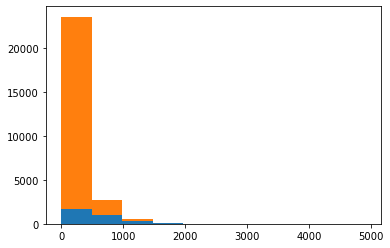

In [23]:
(n , bins, patches) = plt.hist([duration_yes,duration_no], bins= 10, stacked = True)
n_table = np.column_stack ((n[0], n[1]))
n_norm = n_table / n_table.sum (axis=1)[:, None]
ourbins = np.column_stack ((bins[0:10], bins[1:11]))

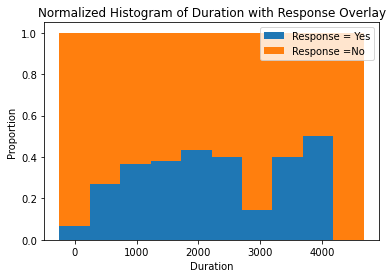

In [24]:
p1 = plt.bar (x = ourbins [:,0], height = n_norm [:,0], width = ourbins [:, 1] - ourbins [:,0])
p2 = plt.bar (x = ourbins [:,0], height = n_norm [:,1], width = ourbins [:, 1] - ourbins [:, 0], bottom = n_norm [:,0])
plt.legend(['Response = Yes', 'Response =No'])
plt.title('Normalized Histogram of Duration with Response Overlay')
plt.xlabel('Duration'); plt.ylabel ('Proportion'); plt.show()

# Strenghth: can distinguish proportion patterns
# Weekness: can't know total number of records nor the data distribution.

In [25]:
# Q3: Construct a contingency table of job with response, with counts and column percentages.


In [26]:
crosstab03 = pd.crosstab(bank['response'],bank['job']) # with counts
crosstab03    

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
response,,,,,,,,,,,,
no,5903,5631,842,639,1680,852,825,2380,404,3972,573,185
yes,854,420,72,70,209,291,93,201,194,465,94,25


In [27]:
norm_ct03 = round(crosstab03.div(crosstab03.sum(0),axis=1)*100,2) # column with percentages
norm_ct03

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
response,,,,,,,,,,,,
no,87.36,93.06,92.12,90.13,88.94,74.54,89.87,92.21,67.56,89.52,85.91,88.1
yes,12.64,6.94,7.88,9.87,11.06,25.46,10.13,7.79,32.44,10.48,14.09,11.9


In [28]:
# Q4: Referring to the previous exercise, do the following:

In [29]:
# a. Combine the job categories according to the following response percentages: 
# 0 < 10, 10 < 25, 25 < 33. Name the new variable job2.

In [30]:
bank['job2'] = bank['job']

In [31]:
# Job codes for yes response percentages within the specified ranges: 

dict_job2 = {"job2":{"admin.":"10 < 25",
                   "blue-collar":"0 < 10",
                   "entrepreneur":"0 < 10",
                   "housemaid":"0 < 10",
                   "management":"10 < 25",
                   "retired":"25 < 33",
                   "self-employed":"10 < 25",
                   "services":"0 < 10",
                   "student":"25 < 33",
                   "technician":"10 < 25",
                   "unemployed":"10 < 25",
                   "unknown":"10 < 25"}}

In [32]:
bank.replace(dict_job2, inplace=True) # See changes in the job field.
bank 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,job2
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0 < 10
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0 < 10
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0 < 10
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0 < 10
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0 < 10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26869,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,no,10 < 25
26870,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes,10 < 25
26871,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,9,1,success,-1.1,94.767,-50.8,1.028,4963,no,10 < 25
26872,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes,25 < 33


In [33]:
# b. Provide a contingency table of job2 with response, with counts and column percentages. Describe what you see.

In [34]:
crosstab04 = pd.crosstab(bank['response'],bank['job2']) # with counts
crosstab04    

job2,0 < 10,10 < 25,25 < 33
response,,,
no,9492,13138,1256
yes,763,1740,485


In [35]:
norm_ct04 = round(crosstab04.div(crosstab04.sum(0),axis=1)*100,2) # column with percentages
norm_ct04

job2,0 < 10,10 < 25,25 < 33
response,,,
no,92.56,88.3,72.14
yes,7.44,11.7,27.86


In [36]:
# After categorizing response based on percentages, I can see the proportion as percentage of the response within each category. 
# However to know the majority category, we refer to the first contingincy table (crosstab04), 
# where it's obvious that Jcode2 has the most number of records. 

In [37]:
# c. Provide a normalized histogram of job2 with response. Describe the relationship. 

In [38]:
job2_yes = bank[bank.response == "yes"]['job2']
job2_no = bank[bank.response == "no"]['job2']

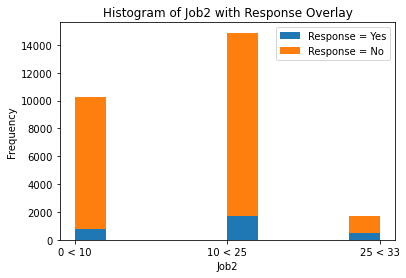

In [39]:
plt.hist([job2_yes,job2_no], stacked = True)
plt.legend(['Response = Yes', 'Response = No'])
plt.title('Histogram of Job2 with Response Overlay')
plt.xlabel('Job2'); plt.ylabel('Frequency'); plt.show()

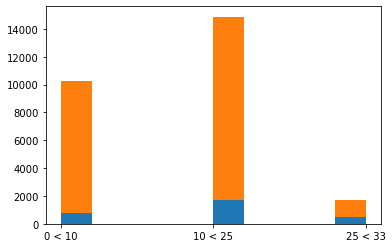

In [40]:
(n , bins, patches) = plt.hist([job2_yes,job2_no], stacked = True)

In [41]:
n_table = np.column_stack ((n[0], n[1]))

In [42]:
ourbins = np.column_stack ((bins[0:10], bins[1:11]))

In [43]:
n_norm = n_table / n_table.sum (axis=1)[:, None]

<ipython-input-43-2143064463f8>:1: RuntimeWarning: invalid value encountered in true_divide
  n_norm = n_table / n_table.sum (axis=1)[:, None]


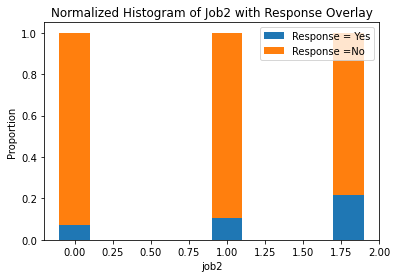

In [44]:
p1 = plt.bar (x = ourbins [:,0], height = n_norm [:,0], width = ourbins [:, 1] - ourbins [:,0])
p2 = plt.bar (x = ourbins [:,0], height = n_norm [:,1], width = ourbins [:, 1] - ourbins [:, 0], bottom = n_norm [:,0])
plt.legend(['Response = Yes', 'Response =No'])
plt.title('Normalized Histogram of Job2 with Response Overlay')
plt.xlabel('job2'); plt.ylabel ('Proportion'); plt.show()

In [45]:
# Here I can identify the proption of response within each category to see which category has the most yes responses as percentage within the category.
